In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans

In [2]:
# Load datasets
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

# Initial exploration for each dataset
for df in [customers_df, products_df, transactions_df]:
    print(df.info())
    print(df.describe())
    print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Product

In [4]:
customers_df.head(10)

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
5,C0006,Brittany Palmer,South America,2024-01-07
6,C0007,Paul Graves,Asia,2022-06-18
7,C0008,David Li,North America,2024-01-13
8,C0009,Joy Clark,Europe,2023-08-14
9,C0010,Aaron Cox,Europe,2022-12-15


Starting EDA analysis...


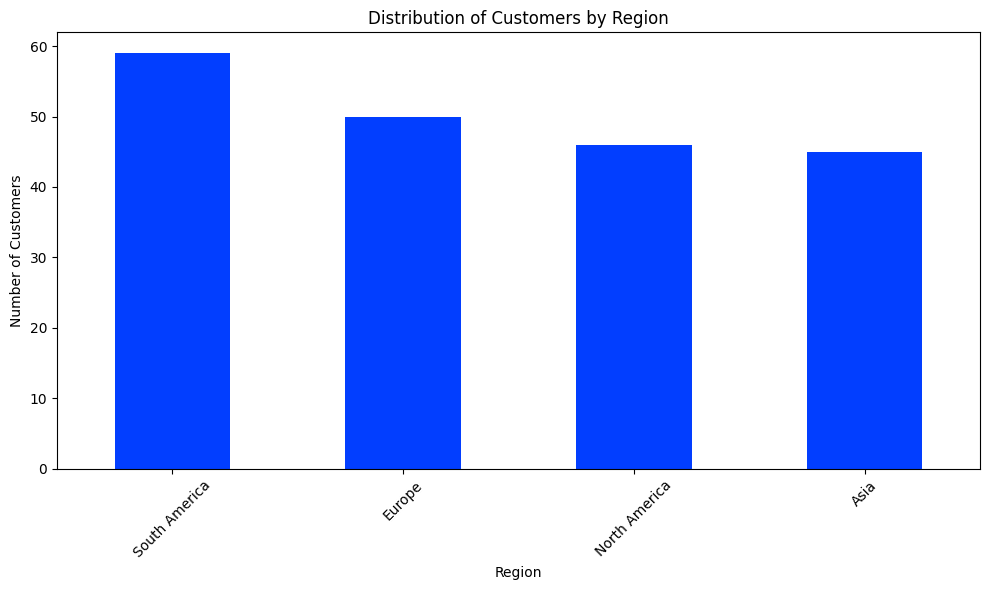

<ipython-input-13-a7b9791baea4>:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_signups = customers_df.resample('M', on='SignupDate').size()


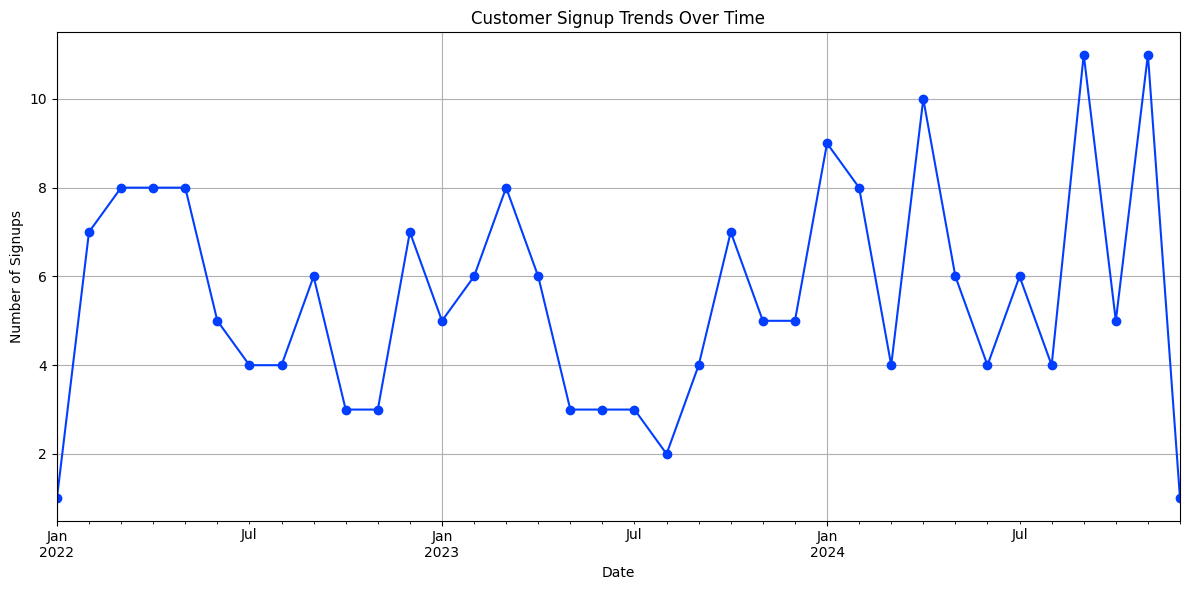

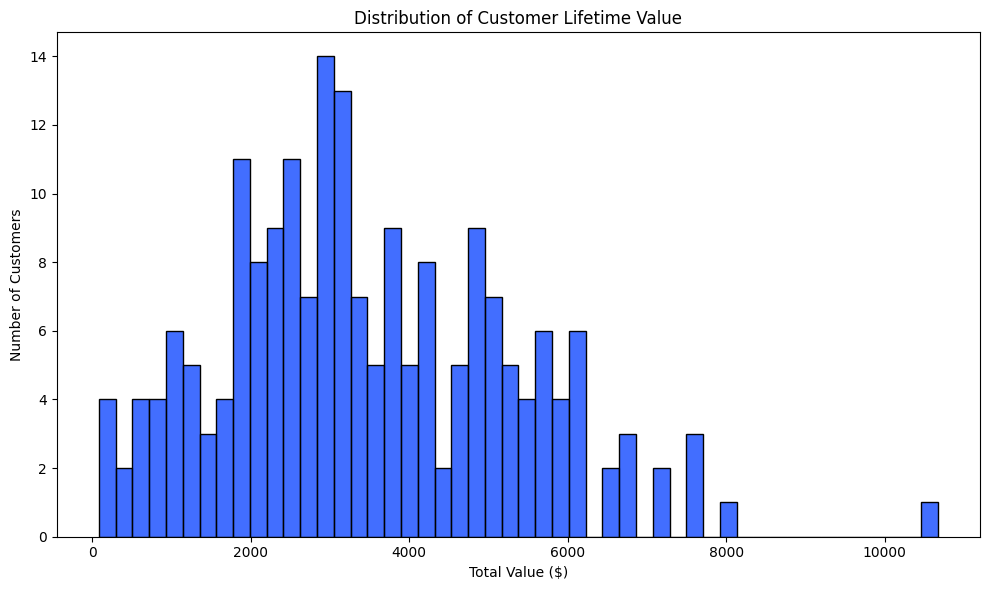

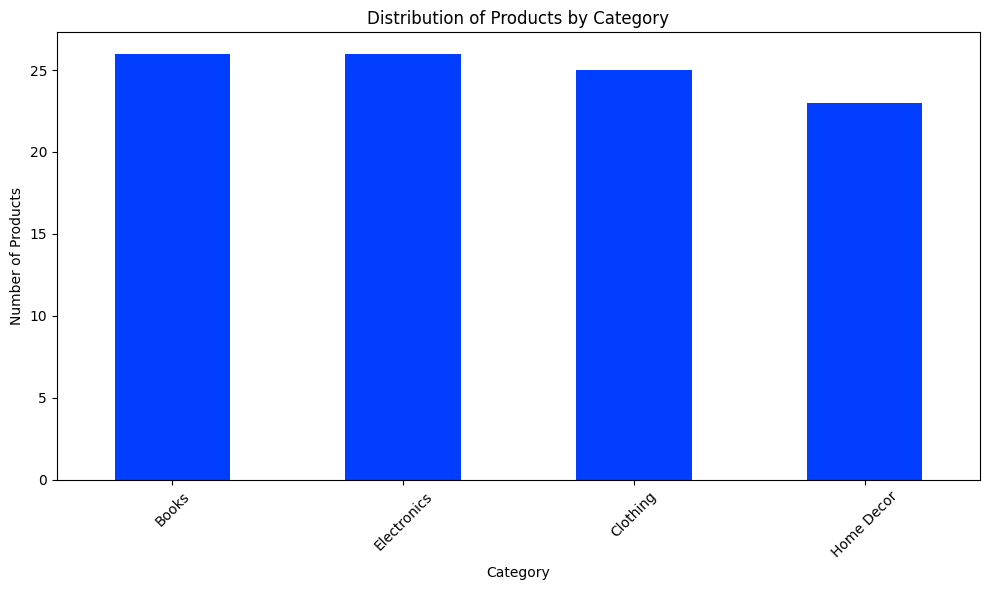

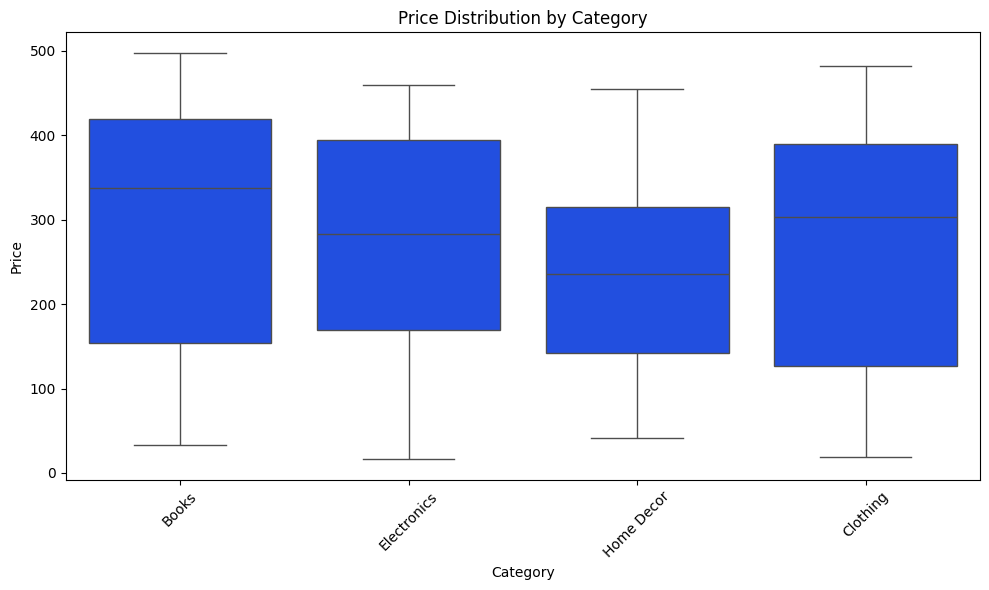

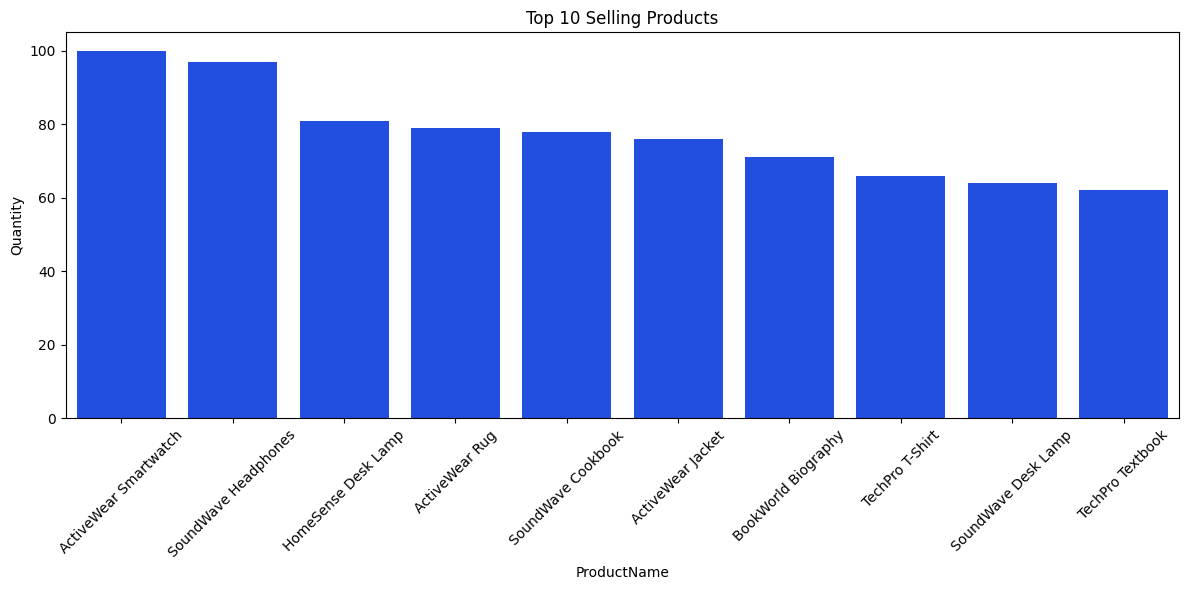

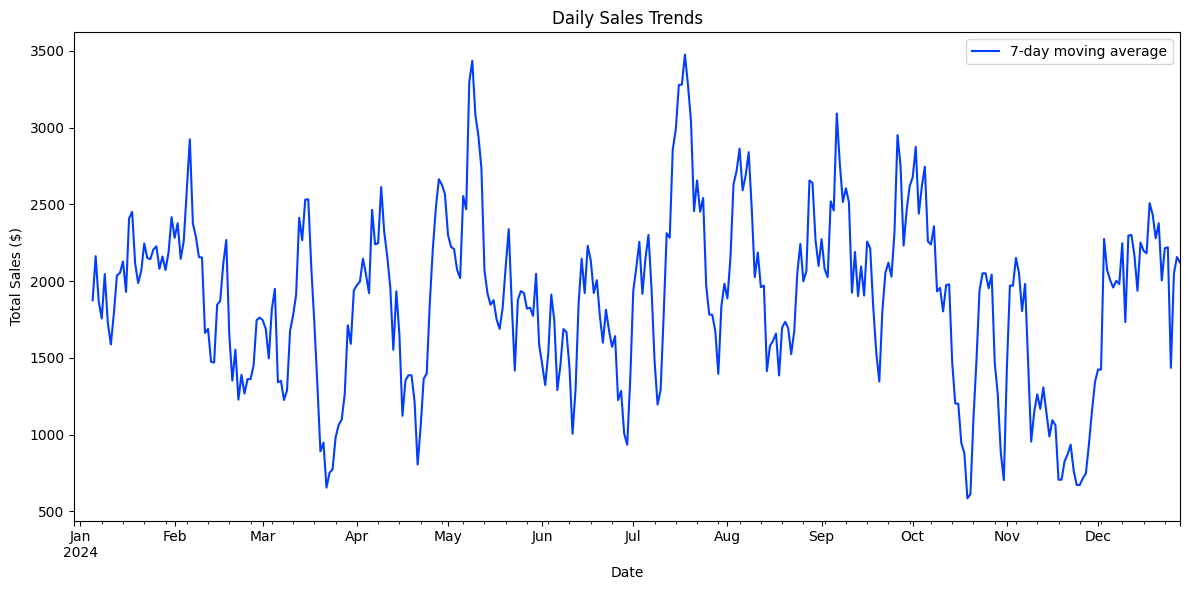

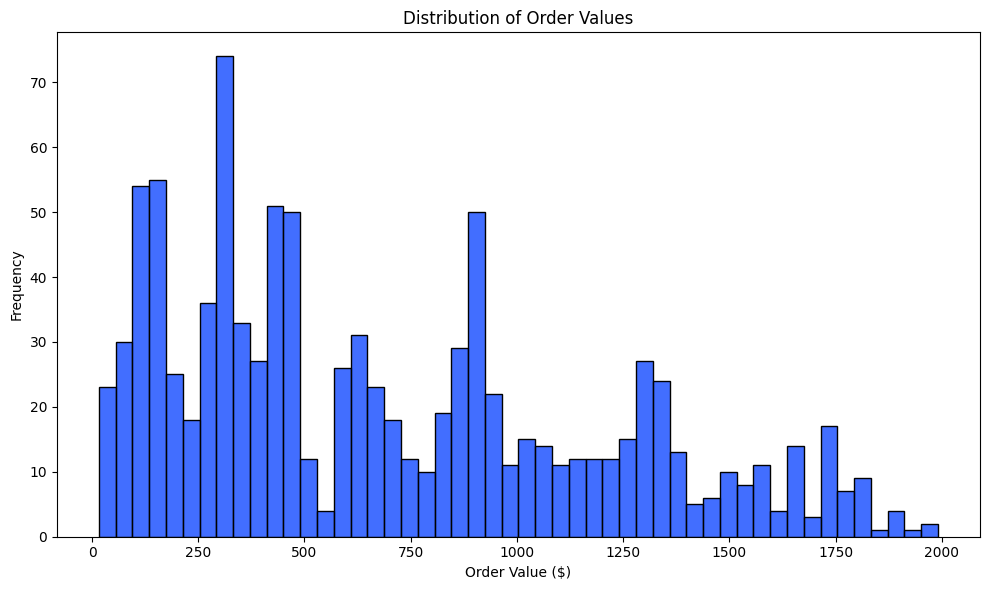

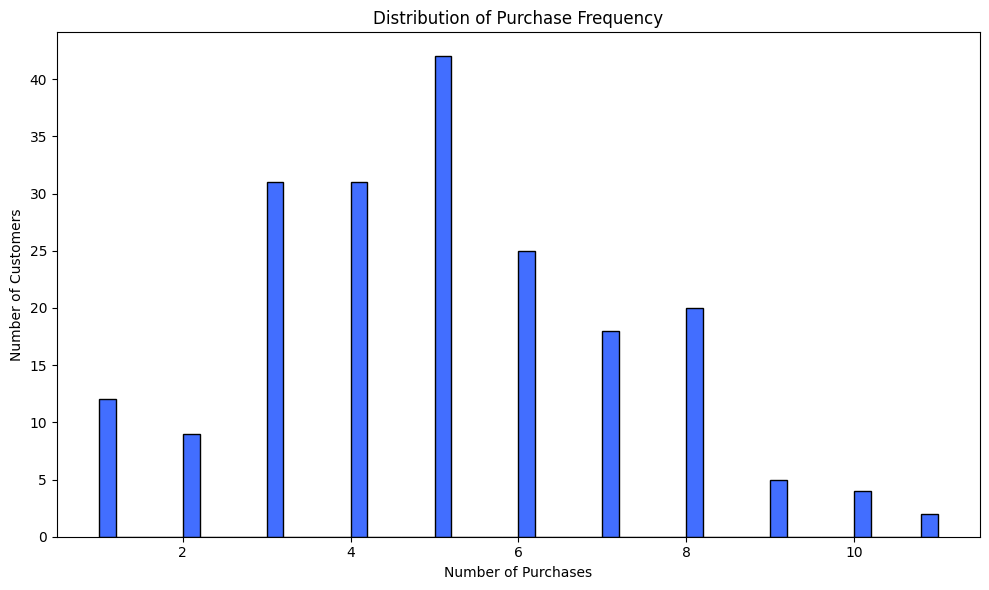

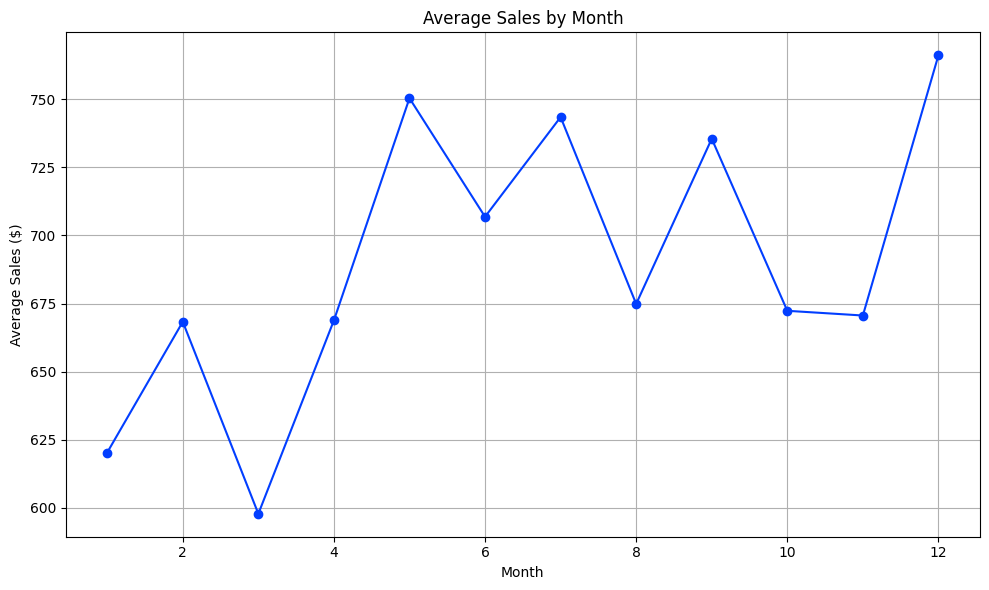

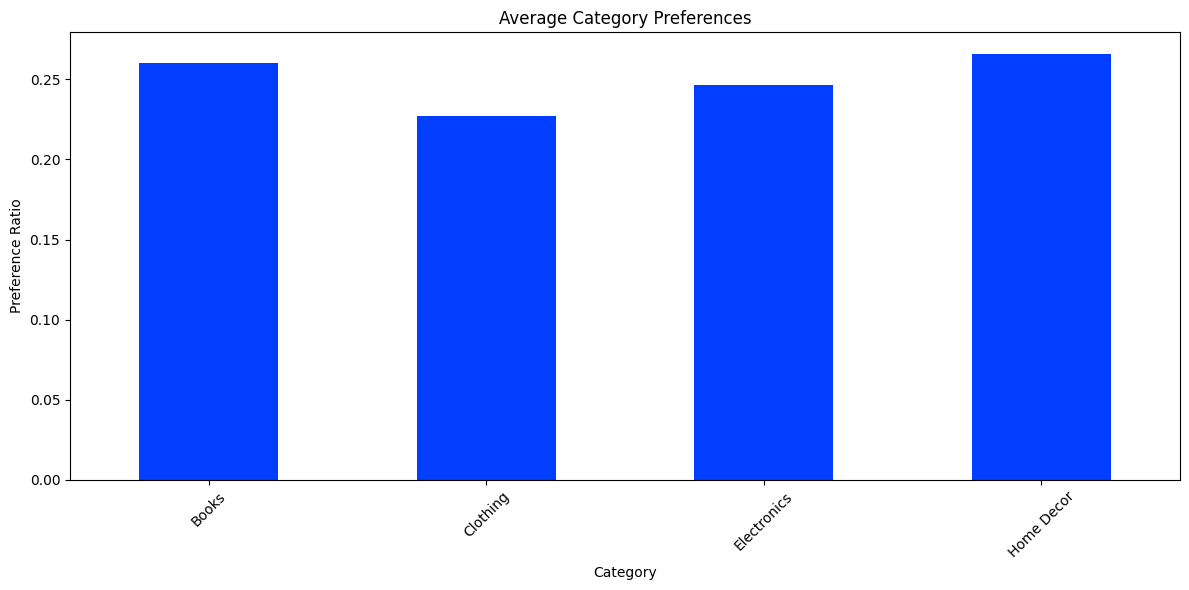


Key Metrics:
Average Customer Lifetime Value: $3467.31
Average Order Value: $690.00
Average Purchase Frequency: 5.03 purchases per customer
Average Customer Lifespan: 224.0 days


In [13]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set plotting style
sns.set_palette("bright")

# 1. Customer Analysis
def analyze_customers(customers_df, transactions_df):
    # Distribution of customers by region
    plt.figure(figsize=(10, 6))
    customers_df['Region'].value_counts().plot(kind='bar')
    plt.title('Distribution of Customers by Region')
    plt.xlabel('Region')
    plt.ylabel('Number of Customers')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Customer signup trends over time
    customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
    monthly_signups = customers_df.resample('M', on='SignupDate').size()

    plt.figure(figsize=(12, 6))
    monthly_signups.plot(kind='line', marker='o')
    plt.title('Customer Signup Trends Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Signups')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Calculate customer lifetime value
    customer_transactions = transactions_df.groupby('CustomerID')['TotalValue'].sum()
    plt.figure(figsize=(10, 6))
    sns.histplot(customer_transactions, bins=50)
    plt.title('Distribution of Customer Lifetime Value')
    plt.xlabel('Total Value ($)')
    plt.ylabel('Number of Customers')
    plt.tight_layout()
    plt.show()

    return customer_transactions

# 2. Product Analysis
def analyze_products(products_df, transactions_df):
    # Distribution of products by category
    plt.figure(figsize=(10, 6))
    products_df['Category'].value_counts().plot(kind='bar')
    plt.title('Distribution of Products by Category')
    plt.xlabel('Category')
    plt.ylabel('Number of Products')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Price distribution analysis
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Category', y='Price', data=products_df)
    plt.title('Price Distribution by Category')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Top selling products
    product_sales = transactions_df.groupby('ProductID')['Quantity'].sum()
    top_products = product_sales.nlargest(10).index
    top_products_data = products_df[products_df['ProductID'].isin(top_products)]

    plt.figure(figsize=(12, 6))
    sns.barplot(x='ProductName', y='Quantity',
                data=transactions_df.merge(products_df, on='ProductID')
                .groupby('ProductName')['Quantity']
                .sum()
                .nlargest(10)
                .reset_index())
    plt.title('Top 10 Selling Products')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return product_sales

# 3. Transaction Analysis
def analyze_transactions(transactions_df):
    # Convert TransactionDate to datetime
    transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

    # Sales trends over time
    daily_sales = transactions_df.resample('D', on='TransactionDate')['TotalValue'].sum()

    plt.figure(figsize=(12, 6))
    daily_sales.rolling(7).mean().plot(label='7-day moving average')
    plt.title('Daily Sales Trends')
    plt.xlabel('Date')
    plt.ylabel('Total Sales ($)')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Average order value
    avg_order = transactions_df.groupby('TransactionID')['TotalValue'].mean()

    plt.figure(figsize=(10, 6))
    sns.histplot(avg_order, bins=50)
    plt.title('Distribution of Order Values')
    plt.xlabel('Order Value ($)')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

    # Purchase frequency analysis
    purchase_frequency = transactions_df.groupby('CustomerID').size()

    plt.figure(figsize=(10, 6))
    sns.histplot(purchase_frequency, bins=50)
    plt.title('Distribution of Purchase Frequency')
    plt.xlabel('Number of Purchases')
    plt.ylabel('Number of Customers')
    plt.tight_layout()
    plt.show()

    return daily_sales, avg_order, purchase_frequency

# 4. Advanced Analysis
def advanced_analysis(customers_df, products_df, transactions_df):
    # Merge all data
    full_data = transactions_df.merge(customers_df, on='CustomerID')\
                              .merge(products_df, on='ProductID')

    # Customer purchase history profiles
    customer_profiles = full_data.groupby('CustomerID').agg({
        'TotalValue': ['sum', 'mean', 'count'],
        'Quantity': ['sum', 'mean'],
        'Category': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown'
    }).round(2)

    # Seasonal trends
    full_data['Month'] = full_data['TransactionDate'].dt.month
    seasonal_sales = full_data.groupby('Month')['TotalValue'].mean()

    plt.figure(figsize=(10, 6))
    seasonal_sales.plot(kind='line', marker='o')
    plt.title('Average Sales by Month')
    plt.xlabel('Month')
    plt.ylabel('Average Sales ($)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Category preferences
    category_preferences = pd.crosstab(full_data['CustomerID'], full_data['Category'])
    category_preferences_pct = category_preferences.div(category_preferences.sum(axis=1), axis=0)

    plt.figure(figsize=(12, 6))
    category_preferences_pct.mean().plot(kind='bar')
    plt.title('Average Category Preferences')
    plt.xlabel('Category')
    plt.ylabel('Preference Ratio')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return customer_profiles, seasonal_sales, category_preferences_pct

# Function to calculate key metrics
def calculate_key_metrics(transactions_df, customers_df):
    metrics = {}

    # Customer Lifetime Value
    metrics['clv'] = transactions_df.groupby('CustomerID')['TotalValue'].sum().mean()

    # Average Order Value
    metrics['aov'] = transactions_df.groupby('TransactionID')['TotalValue'].sum().mean()

    # Purchase Frequency
    customer_purchase_counts = transactions_df.groupby('CustomerID').size()
    metrics['avg_purchase_frequency'] = customer_purchase_counts.mean()

    # Average Customer Lifespan
    customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
    transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

    customer_first_last = transactions_df.groupby('CustomerID').agg({
        'TransactionDate': ['min', 'max']
    })
    metrics['avg_customer_lifespan'] = (customer_first_last['TransactionDate']['max'] -
                                      customer_first_last['TransactionDate']['min']).mean().days

    return metrics

# Main execution function
def run_eda(customers_df, products_df, transactions_df):
    print("Starting EDA analysis...")

    # Run all analyses
    customer_transactions = analyze_customers(customers_df, transactions_df)
    product_sales = analyze_products(products_df, transactions_df)
    daily_sales, avg_order, purchase_frequency = analyze_transactions(transactions_df)
    customer_profiles, seasonal_sales, category_preferences = advanced_analysis(
        customers_df, products_df, transactions_df)
    metrics = calculate_key_metrics(transactions_df, customers_df)

    # Print key metrics
    print("\nKey Metrics:")
    print(f"Average Customer Lifetime Value: ${metrics['clv']:.2f}")
    print(f"Average Order Value: ${metrics['aov']:.2f}")
    print(f"Average Purchase Frequency: {metrics['avg_purchase_frequency']:.2f} purchases per customer")
    print(f"Average Customer Lifespan: {metrics['avg_customer_lifespan']:.1f} days")

    return {
        'customer_transactions': customer_transactions,
        'product_sales': product_sales,
        'daily_sales': daily_sales,
        'customer_profiles': customer_profiles,
        'metrics': metrics
    }


eda_results = run_eda(customers_df, products_df, transactions_df)

# Access individual results
customer_transactions = eda_results['customer_transactions']
product_sales = eda_results['product_sales']
daily_sales = eda_results['daily_sales']
customer_profiles = eda_results['customer_profiles']
metrics = eda_results['metrics']

# Look Alike model

In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

def create_customer_features(customers_df, transactions_df, products_df):
    """Create feature matrix for customers"""

    # Merge transactions with products
    trans_prod = transactions_df.merge(products_df, on='ProductID')

    # Basic transaction features
    transaction_features = transactions_df.groupby('CustomerID').agg({
        'TotalValue': ['sum', 'mean', 'std'],
        'Quantity': ['sum', 'mean', 'std'],
        'TransactionID': 'count'
    }).fillna(0)

    # Flatten column names
    transaction_features.columns = ['_'.join(col).strip() for col in transaction_features.columns.values]

    # Category preferences (percentage of purchases in each category)
    category_pivot = pd.crosstab(trans_prod['CustomerID'], trans_prod['Category'], normalize='index')

    # Average price point preference
    price_preference = trans_prod.groupby('CustomerID')['Price_x'].mean()

    # Add signup date features
    customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
    signup_features = pd.DataFrame({
        'account_age_days': (pd.Timestamp.now() - customers_df['SignupDate']).dt.days
    }, index=customers_df['CustomerID'])

    # Region encoding
    region_dummies = pd.get_dummies(customers_df['Region'], prefix='region')
    region_dummies['CustomerID'] = customers_df['CustomerID']
    region_features = region_dummies.set_index('CustomerID')

    # Combine all features
    feature_matrix = pd.concat([
        transaction_features,
        category_pivot,
        price_preference.rename('avg_price_preference'),
        signup_features,
        region_features
    ], axis=1).fillna(0)

    return feature_matrix

def normalize_features(feature_matrix):
    """Normalize features using StandardScaler"""
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(feature_matrix)
    return pd.DataFrame(scaled_features, index=feature_matrix.index, columns=feature_matrix.columns)

def get_lookalikes(customer_id, feature_matrix, n_recommendations=3):
    """Find similar customers based on cosine similarity"""

    # Get customer feature vector
    customer_vector = feature_matrix.loc[customer_id].values.reshape(1, -1)

    # Calculate cosine similarity with all other customers
    similarities = cosine_similarity(customer_vector, feature_matrix)[0]

    # Create DataFrame with similarities
    similarity_df = pd.DataFrame({
        'CustomerID': feature_matrix.index,
        'similarity_score': similarities
    })

    # Remove the customer itself and sort by similarity
    recommendations = similarity_df[similarity_df['CustomerID'] != customer_id]\
        .sort_values('similarity_score', ascending=False)\
        .head(n_recommendations)

    return recommendations

def generate_lookalike_recommendations(customers_df, transactions_df, products_df,
                                     start_id="C0001", end_id="C0020"):
    """Generate lookalike recommendations for a range of customer IDs"""

    # Create feature matrix
    print("Creating feature matrix...")
    feature_matrix = create_customer_features(customers_df, transactions_df, products_df)

    # Normalize features
    print("Normalizing features...")
    normalized_features = normalize_features(feature_matrix)

    # Generate recommendations for each customer
    print("Generating recommendations...")
    recommendations_dict = {}

    # Get all customer IDs in range
    customer_range = customers_df[
        (customers_df['CustomerID'] >= start_id) &
        (customers_df['CustomerID'] <= end_id)
    ]['CustomerID']

    for customer_id in customer_range:
        lookalikes = get_lookalikes(customer_id, normalized_features)
        recommendations_dict[customer_id] = [
            {
                'similar_customer': row['CustomerID'],
                'similarity_score': row['similarity_score']
            }
            for _, row in lookalikes.iterrows()
        ]

    # Create output DataFrame
    output_rows = []
    for customer_id, recommendations in recommendations_dict.items():
        similar_customers = [r['similar_customer'] for r in recommendations]
        similarity_scores = [f"{r['similarity_score']:.4f}" for r in recommendations]

        output_rows.append({
            'customer_id': customer_id,
            'similar_customer_1': similar_customers[0],
            'similarity_score_1': similarity_scores[0],
            'similar_customer_2': similar_customers[1],
            'similarity_score_2': similarity_scores[1],
            'similar_customer_3': similar_customers[2],
            'similarity_score_3': similarity_scores[2]
        })

    output_df = pd.DataFrame(output_rows)
    return output_df

def save_recommendations(output_df, filename):
    """Save recommendations to CSV file"""
    output_df.to_csv(filename, index=False)
    print(f"Recommendations saved to {filename}")



output_df = generate_lookalike_recommendations(
    customers_df,
    transactions_df,
    products_df
)

# Save to CSV (replace with your name)
save_recommendations(output_df, 'FirstName_LastName_Lookalike.csv')

# Display first few recommendations
print("\nSample recommendations:")
print(output_df.head())

Creating feature matrix...
Normalizing features...
Generating recommendations...
Recommendations saved to FirstName_LastName_Lookalike.csv

Sample recommendations:
  customer_id similar_customer_1 similarity_score_1 similar_customer_2  \
0       C0001              C0130             0.7426              C0120   
1       C0002              C0106             0.8480              C0134   
2       C0003              C0195             0.7553              C0129   
3       C0004              C0113             0.8979              C0104   
4       C0005              C0146             0.8127              C0007   

  similarity_score_2 similar_customer_3 similarity_score_3  
0             0.7239              C0181             0.6561  
1             0.8163              C0159             0.7445  
2             0.7446              C0039             0.7020  
3             0.7998              C0039             0.7992  
4             0.7756              C0186             0.6804  


In [20]:
print(transactions_df.shape)
print(products_df.shape)

(1000, 7)
(100, 4)


In [22]:
trans_prod = transactions_df.merge(products_df, on='ProductID')

In [23]:
trans_prod.head(10)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
5,T00442,C0188,P067,2024-12-26 14:40:03,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
6,T00490,C0195,P067,2024-11-24 11:49:48,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
7,T00536,C0008,P067,2024-09-22 06:13:59,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
8,T00564,C0157,P067,2024-12-07 17:57:40,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
9,T00631,C0130,P067,2024-05-14 23:14:59,2,601.36,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [27]:
trans_prod.columns

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'ProductName', 'Category',
       'Price_y'],
      dtype='object')

In [29]:
all_prices_equal = (trans_prod['Price_x'] == trans_prod['Price_y']).all()

# Display the result
if all_prices_equal:
    print("All values of Price_x are equal to Price_y.")
else:
    print("Some values of Price_x are not equal to Price_y.")

All values of Price_x are equal to Price_y.


In [31]:
trans_prod = trans_prod.drop(columns=['Price_y'])

# Rename Price_x column to Price
trans_prod = trans_prod.rename(columns={'Price_x': 'Price'})

# Display the updated DataFrame
print(trans_prod.head())

  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue   Price                      ProductName     Category  
0      300.68  300.68  ComfortLiving Bluetooth Speaker  Electronics  
1      300.68  300.68  ComfortLiving Bluetooth Speaker  Electronics  
2      300.68  300.68  ComfortLiving Bluetooth Speaker  Electronics  
3      601.36  300.68  ComfortLiving Bluetooth Speaker  Electronics  
4      902.04  300.68  ComfortLiving Bluetooth Speaker  Electronics  


In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

def prepare_features(customers_df, transactions_df, products_df):
    """Prepare and combine features for clustering"""

    # Merge transactions with products
    trans_prod = transactions_df.merge(products_df, on='ProductID')

    # Customer transaction features
    transaction_features = transactions_df.groupby('CustomerID').agg({
        'TotalValue': ['sum', 'mean', 'std'],
        'Quantity': ['sum', 'mean', 'std'],
        'TransactionID': 'count'
    }).fillna(0)

    # Flatten column names
    transaction_features.columns = ['_'.join(col).strip() for col in transaction_features.columns.values]

    # Category preferences
    category_pivot = pd.crosstab(
        trans_prod['CustomerID'],
        trans_prod['Category'],
        normalize='index'
    )

    # Recency, Frequency, Monetary (RFM) features
    transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])
    last_transaction_date = transactions_df['TransactionDate'].max()

    rfm_features = transactions_df.groupby('CustomerID').agg({
        'TransactionDate': lambda x: (last_transaction_date - x.max()).days,
        'TransactionID': 'count',
        'TotalValue': 'sum'
    }).rename(columns={
        'TransactionDate': 'recency',
        'TransactionID': 'frequency',
        'TotalValue': 'monetary'
    })

    # Customer profile features
    customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
    customer_features = pd.DataFrame({
        'account_age_days': (last_transaction_date - customers_df['SignupDate']).dt.days
    }, index=customers_df['CustomerID'])

    # Region encoding
    region_dummies = pd.get_dummies(customers_df['Region'], prefix='region')
    region_dummies.index = customers_df['CustomerID']

    # Combine all features
    feature_matrix = pd.concat([
        transaction_features,
        category_pivot,
        rfm_features,
        customer_features,
        region_dummies
    ], axis=1).fillna(0)

    return feature_matrix

def find_optimal_clusters(scaled_features, max_clusters=10):
    """Find optimal number of clusters using Davies-Bouldin Index"""

    results = []
    best_score = float('inf')
    best_n_clusters = 0

    for n_clusters in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        labels = kmeans.fit_predict(scaled_features)

        db_index = davies_bouldin_score(scaled_features, labels)
        silhouette = silhouette_score(scaled_features, labels)

        results.append({
            'n_clusters': n_clusters,
            'db_index': db_index,
            'silhouette': silhouette
        })

        if db_index < best_score:
            best_score = db_index
            best_n_clusters = n_clusters

    return pd.DataFrame(results), best_n_clusters

def visualize_clusters(scaled_features, labels):
    """Create PCA visualization of clusters"""

    # Reduce dimensions using PCA
    pca = PCA(n_components=2)
    features_2d = pca.fit_transform(scaled_features)

    # Create visualization
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(features_2d[:, 0], features_2d[:, 1], c=labels, cmap='viridis')
    plt.title('Customer Segments Visualization (PCA)')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.colorbar(scatter, label='Cluster')
    plt.tight_layout()

    return features_2d, pca.explained_variance_ratio_

def analyze_clusters(feature_matrix, labels):
    """Analyze characteristics of each cluster"""

    # Add cluster labels to feature matrix
    feature_matrix = feature_matrix.copy()
    feature_matrix['Cluster'] = labels

    # Calculate cluster profiles
    cluster_profiles = feature_matrix.groupby('Cluster').mean()

    # Calculate cluster sizes
    cluster_sizes = pd.Series(labels).value_counts().sort_index()

    return cluster_profiles, cluster_sizes

def generate_cluster_report(cluster_profiles, cluster_sizes, db_index, silhouette):
    """Generate a report describing the clusters"""

    report = f"""
# Customer Segmentation Analysis Report

## Clustering Metrics
- Number of Clusters: {len(cluster_sizes)}
- Davies-Bouldin Index: {db_index:.4f}
- Silhouette Score: {silhouette:.4f}

## Cluster Sizes
{cluster_sizes.to_frame('Size').to_markdown()}

## Cluster Characteristics
"""

    for cluster in cluster_profiles.index:
        report += f"\n### Cluster {cluster} ({cluster_sizes[cluster]} customers)\n"

        # Get top features for this cluster
        top_features = cluster_profiles.loc[cluster].nlargest(5)
        report += "\nKey Characteristics:\n"
        for feature, value in top_features.items():
            report += f"- {feature}: {value:.4f}\n"

    return report

def run_clustering_analysis(customers_df, transactions_df, products_df):
    """Run complete clustering analysis"""

    print("Preparing features...")
    feature_matrix = prepare_features(customers_df, transactions_df, products_df)

    # Scale features
    print("Scaling features...")
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(feature_matrix)

    # Find optimal number of clusters
    print("Finding optimal number of clusters...")
    cluster_results, best_n_clusters = find_optimal_clusters(scaled_features)

    # Perform final clustering
    print(f"Performing final clustering with {best_n_clusters} clusters...")
    kmeans = KMeans(n_clusters=best_n_clusters, random_state=42)
    labels = kmeans.fit_predict(scaled_features)

    # Calculate final metrics
    final_db_index = davies_bouldin_score(scaled_features, labels)
    final_silhouette = silhouette_score(scaled_features, labels)

    # Visualize clusters
    print("Creating visualizations...")
    features_2d, explained_variance = visualize_clusters(scaled_features, labels)

    # Analyze clusters
    print("Analyzing cluster characteristics...")
    cluster_profiles, cluster_sizes = analyze_clusters(feature_matrix, labels)

    # Generate report
    print("Generating report...")
    report = generate_cluster_report(
        cluster_profiles,
        cluster_sizes,
        final_db_index,
        final_silhouette
    )

    return {
        'feature_matrix': feature_matrix,
        'labels': labels,
        'cluster_results': cluster_results,
        'cluster_profiles': cluster_profiles,
        'cluster_sizes': cluster_sizes,
        'report': report,
        'db_index': final_db_index,
        'silhouette': final_silhouette
    }

Preparing features...
Scaling features...
Finding optimal number of clusters...
Performing final clustering with 9 clusters...
Creating visualizations...
Analyzing cluster characteristics...
Generating report...


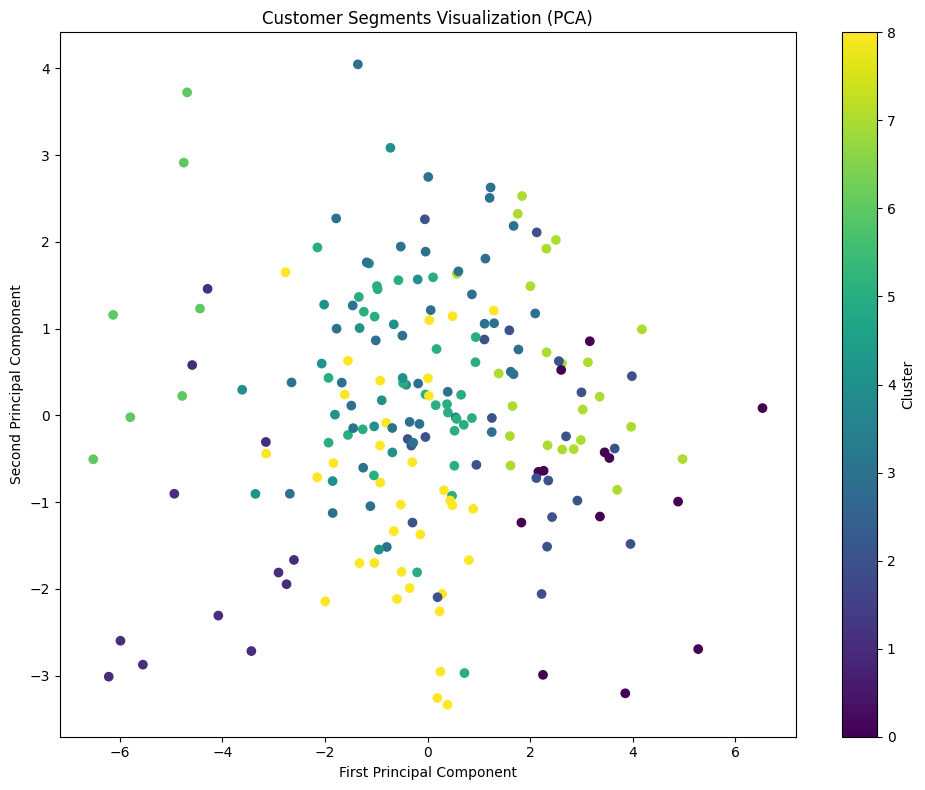

In [33]:
# Run the complete analysis
results = run_clustering_analysis(customers_df, transactions_df, products_df)

# Save the report to a markdown file
with open('clustering_report.md', 'w') as f:
    f.write(results['report'])

# Convert the markdown to PDF using your preferred method
# You can use a markdown editor or online converter

Preparing features...
Scaling features...
Finding optimal number of clusters...
Performing final clustering with 9 clusters...
Creating visualizations...
Analyzing cluster characteristics...
Generating report...
Clustering Results:
Optimal number of clusters: 9
Davies-Bouldin Index: 1.5889
Silhouette Score: 0.1748

Cluster Sizes:
0    13
1    12
2    23
3    40
4    17
5    30
6     7
7    23
8    35
Name: count, dtype: int64

Cluster Profiles:
         TotalValue_sum  TotalValue_mean  TotalValue_std  Quantity_sum  \
Cluster                                                                  
0           6300.546154       734.405029      488.965032     23.153846   
1            650.510833       362.821694       96.099990      3.166667   
2           4896.314783       743.069636      480.909983     18.000000   
3           3242.691500       735.167637      487.079645     11.600000   
4           2152.891765       686.554618      456.883711      7.941176   
5           2897.629000       638

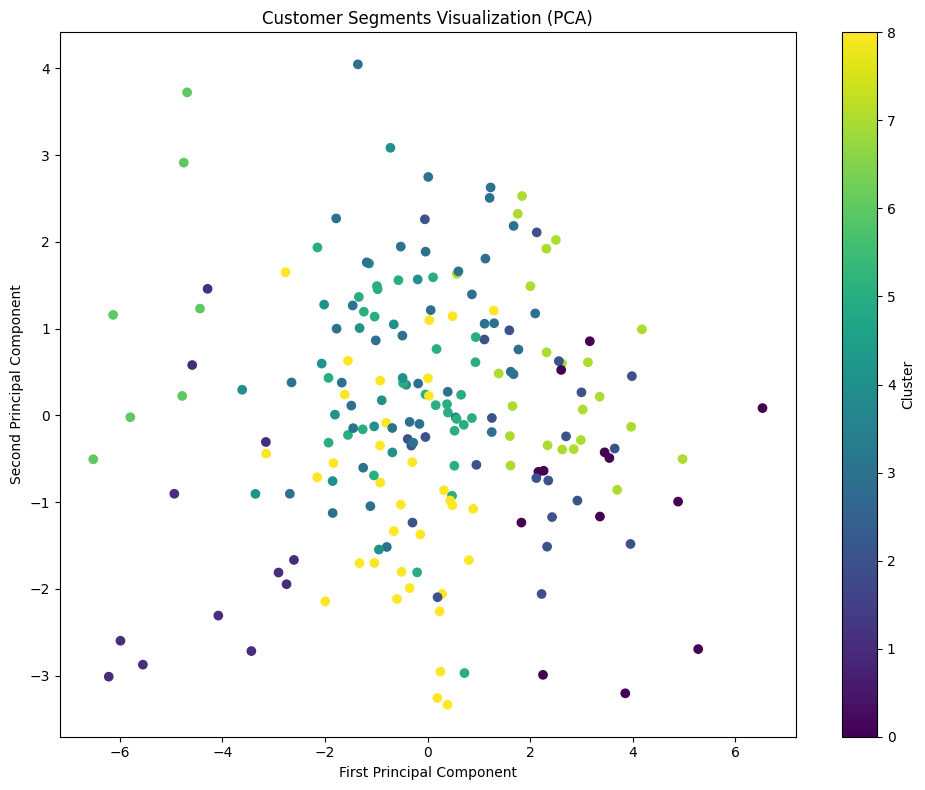

In [35]:
# Import required libraries
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.preprocessing import StandardScaler

# Load data
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

# Copy and run all functions from the artifact

# Run analysis
results = run_clustering_analysis(customers_df, transactions_df, products_df)

# Display results
print("Clustering Results:")
print(f"Optimal number of clusters: {len(results['cluster_sizes'])}")
print(f"Davies-Bouldin Index: {results['db_index']:.4f}")
print(f"Silhouette Score: {results['silhouette']:.4f}")

# Display cluster sizes
print("\nCluster Sizes:")
print(results['cluster_sizes'])

# Display cluster profiles
print("\nCluster Profiles:")
print(results['cluster_profiles'])

In [37]:
import zipfile
import os
from google.colab import files
directory_path = '/content'  # Replace with the correct path

# Get all files in the directory
files_to_zip = [f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f))]

# Create a zip file
with zipfile.ZipFile('/content/all_files.zip', 'w') as zipf:
    for file in files_to_zip:
        zipf.write(os.path.join(directory_path, file), arcname=file)

# Download the zip file
files.download('/content/all_files.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>